In [229]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import time

Найти данные для классификации. Данные в группе повторяться не
должны! Предобработать данные, если это необходимо.

In [230]:
data = load_wine(as_frame=True)
predictors = data.data
target = data.target
target_names = data.target_names


In [231]:
print(predictors.head(5),'\n\nЦелевая переменная')
print(target.head(5))
print('Название классов:\n',target_names)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

Изобразить гистограмму, которая показывает баланс классов. Сделать
выводы.

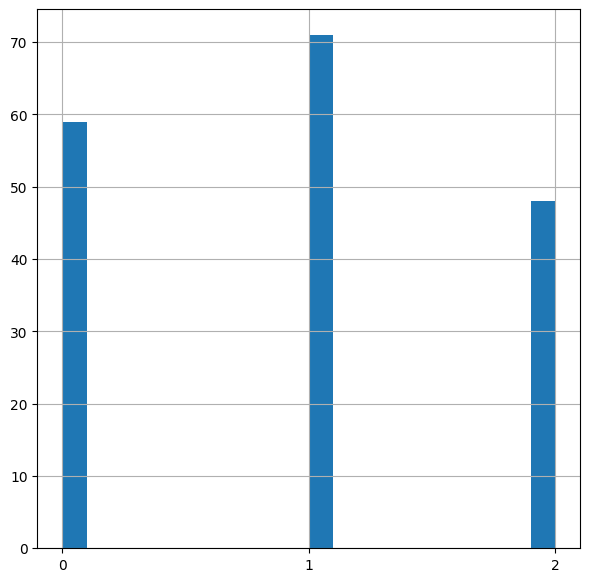

In [232]:
target.hist(bins=20,  figsize=(7,7))
plt.xticks([0,1,2])
plt.show()


Разбить выборку на тренировочную и тестовую. Тренировочная для
обучения модели, тестовая для проверки ее качества

In [233]:
x_train, x_test, y_train, y_test = train_test_split(predictors,
                                                    target,
                                                    train_size=0.8,
                                                    shuffle=True,
                                                    random_state=271)
print(' Размер для признаков обучающей выборки',x_train.shape, '\n',
      'Размер для признаков тестовой выборки',x_test.shape, '\n',
      'Размер для целевого показателя обучающей выборки',y_train.shape,'\n',
      'Размер для показателя тестовой выборки', y_test.shape)

 Размер для признаков обучающей выборки (142, 13) 
 Размер для признаков тестовой выборки (36, 13) 
 Размер для целевого показателя обучающей выборки (142,) 
 Размер для показателя тестовой выборки (36,)


Применить алгоритмы классификации: логистическая регрессия, SVM, KNN.  Построить  матрицу  ошибок  по  результатам  работы  моделей 
(использовать confusion_matrix из sklearn.metrics). accuracy,  precision, 
recall  и  f1-меру  (можно  использовать  classification_report  из 
sklearn.metrics).  Также  сравнить  время  работы  алгоритмов.  Сделать 
выводы.

Логистическая регрессия

In [234]:
start_time = time.time()
model = LogisticRegression(random_state=271)


In [235]:
model.fit(x_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=271)

In [236]:
y_predict = model.predict(x_test)
print("--- %s seconds ---" % (time.time() - start_time))
print(y_predict)
print(np.array(y_test))

--- 0.13899922370910645 seconds ---
[2 1 0 0 1 2 1 1 1 1 1 0 1 0 1 2 1 1 1 2 2 2 1 2 2 0 0 1 2 2 2 1 1 1 0 1]
[2 1 1 1 1 1 1 1 1 1 1 0 1 0 1 2 1 1 1 2 2 2 1 2 2 0 0 1 2 2 2 1 1 1 0 1]


In [237]:
fig = px.imshow(confusion_matrix(y_test, y_predict), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title = 'Prediction')

In [238]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.86      0.92        21
           2       0.91      1.00      0.95        10

    accuracy                           0.92        36
   macro avg       0.87      0.95      0.90        36
weighted avg       0.94      0.92      0.92        36



SVM

In [239]:
start_time = time.time()
param_kernel = ('linear', 'rbf', 'poly', 'sigmoid')
parameters = {'kernel': param_kernel}
model = SVC()
grid_search_svm = GridSearchCV(estimator=model,param_grid=parameters,cv=6)
grid_search_svm.fit(x_train, y_train)


GridSearchCV(cv=6, estimator=SVC(),
             param_grid={'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [240]:
best_model = grid_search_svm.best_estimator_
best_model.kernel

'linear'

In [241]:
svm_preds = best_model.predict(x_test)
print("--- %s seconds ---" % (time.time() - start_time))
svm_preds

--- 0.5719983577728271 seconds ---


array([2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 1])

In [242]:
print(classification_report(svm_preds,y_test))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.86      1.00      0.92        18
           2       1.00      0.91      0.95        11

    accuracy                           0.92        36
   macro avg       0.95      0.87      0.90        36
weighted avg       0.93      0.92      0.91        36



In [243]:
fig = px.imshow(confusion_matrix(y_test, svm_preds), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title = 'Prediction')

KNN

In [244]:
start_time = time.time()
number_of_neighbors = np.arange(3, 10, 25)
model_KNN = KNeighborsClassifier()
params = {'n_neighbors': number_of_neighbors}

grid_search = GridSearchCV(estimator=model_KNN, param_grid=params, cv=6)


In [245]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3])})

In [246]:
grid_search.best_score_

0.7539251207729469

In [247]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [248]:
knn_preds = grid_search.predict(x_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.23796629905700684 seconds ---


In [249]:
print(classification_report(knn_preds,y_test))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.76      0.76      0.76        21
           2       0.50      0.62      0.56         8

    accuracy                           0.69        36
   macro avg       0.69      0.65      0.66        36
weighted avg       0.71      0.69      0.70        36



In [250]:
fig = px.imshow(confusion_matrix(y_test, knn_preds), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title = 'Prediction')